### Bag of words: Exercises


- In this Exercise, you are going to classify whether a given movie review is **positive or negative**.
- you are going to use Bag of words for pre-processing the text and apply different classification algorithms.
- Sklearn CountVectorizer has the inbuilt implementations for Bag of Words.

In [3]:
#Import necessary libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from  sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

### **About Data: IMDB Dataset**

Credits: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews?resource=download


- This data consists of two columns.
        - review
        - sentiment
- Reviews are the statements given by users after watching the movie.
- sentiment feature tells whether the given review is positive or negative.

In [4]:
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
 58% 15.0M/25.7M [00:00<00:00, 153MB/s]
100% 25.7M/25.7M [00:00<00:00, 164MB/s]


In [5]:
#1. read the data provided in the same directory with name 'movies_sentiment_data.csv' and store it in df variable

train_data = pd.read_csv("/content/imdb-dataset-of-50k-movie-reviews.zip")

train_data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [6]:
print(train_data.shape)
print(train_data['sentiment'].value_counts())

(50000, 2)
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [7]:
#creating a new column "Category" which represent 1 if the sentiment is positive or 0 if it is negative
train_data['Category'] = train_data['sentiment'].apply(lambda x : 1 if x =='positive' else 0 )
train_data['Category']

,Category
0,1
1,1
2,1
3,0
4,1
...,...
49995,1
49996,0
49997,0
49998,0


In [8]:
#check the distribution of 'Category' and see whether the Target labels are balanced or not.



In [9]:
#Do the 'train-test' splitting with test size of 20%

X_train , X_val , y_train , y_val = train_test_split(train_data['review'] , train_data['Category'] , test_size=0.2)

**Exercise-1**

1. using sklearn pipeline module create a classification pipeline to classify the movie review's positive or negative.

**Note:**
- use CountVectorizer for pre-processing the text.

- use **Random Forest** as the classifier with estimators as 50 and criterion as entropy.
- print the classification report.

**References**:

- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

- https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      5050
           1       0.83      0.84      0.84      4950

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



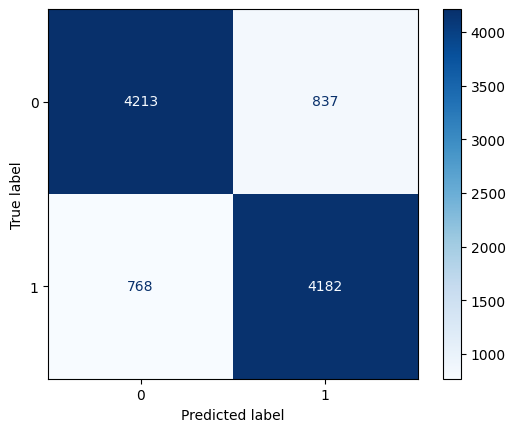

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
#1. create a pipeline object

pipe = Pipeline([('v', CountVectorizer()),
                 ('rf_cls' , RandomForestClassifier(n_estimators=50 , criterion="entropy"))
                  ])


#2. fit with X_train and y_train
pipe.fit(X_train , y_train)

#3. get the predictions for X_val and store it in y_pred

y_pred = pipe.predict(X_val)

#4. print the classfication report
print(classification_report(y_val , y_pred))
disp = ConfusionMatrixDisplay.from_estimator(pipe,X_val,y_val,cmap=plt.cm.Blues)
plt.show()


**Exercise-2**

1. using sklearn pipeline module create a classification pipeline to classify the movie review's positive or negative..

**Note:**
- use CountVectorizer for pre-processing the text.
- use **KNN** as the classifier with n_neighbors of 10 and metric as 'euclidean'.
- print the classification report.

**References**:

- https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html



In [11]:
#1. create a pipeline object

pipe = Pipeline([('v', CountVectorizer()),
                 ('knn_cls' , KNeighborsClassifier(n_neighbors=10 , metric='euclidean'))
])


#2. fit with X_train and y_train
pipe.fit(X_train , y_train)

#3. get the predictions for X_val and store it in y_pred

y_pred = pipe.predict(X_val)

#4. print the classfication report
print(classification_report(y_val , y_pred))

              precision    recall  f1-score   support

           0       0.65      0.67      0.66      5050
           1       0.65      0.63      0.64      4950

    accuracy                           0.65     10000
   macro avg       0.65      0.65      0.65     10000
weighted avg       0.65      0.65      0.65     10000



**Exercise-3**

1. using sklearn pipeline module create a classification pipeline to classify the movie review's positive or negative..

**Note:**
- use CountVectorizer for pre-processing the text.
- use **Multinomial Naive Bayes** as the classifier.
- print the classification report.

**References**:

- https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
- https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html



In [12]:
#1. create a pipeline object

pipe = Pipeline([('v', CountVectorizer()),
                 ('multNB_cls' , MultinomialNB())
                 ])


#2. fit with X_train and y_train
pipe.fit(X_train , y_train)

#3. get the predictions for X_val and store it in y_pred

y_pred = pipe.predict(X_val)

#4. print the classfication report
print(classification_report(y_val , y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      5050
           1       0.86      0.82      0.84      4950

    accuracy                           0.84     10000
   macro avg       0.85      0.84      0.84     10000
weighted avg       0.85      0.84      0.84     10000



### Can you write some observations of why model like KNN fails to produce good results unlike RandomForest and MultinomialNB?



As Machine learning algorithms does not work on Text data directly, we need to convert them into numeric vector and feed that into models while training.
In this process, we convert text into a very high dimensional numeric vector using the technique of Bag of words.
Model like K-Nearest Neighbours(KNN) doesn't work well with high dimensional data because with large number of dimensions, it becomes difficult for the algorithm to calculate distance in each dimension. In higher dimensional space, the cost to calculate distance becomes expensive and hence impacts the performance of model.
The easy calculation of probabilities for the words in corpus(Bag of words) and storing them in contigency table is the major reason for the Multinomial NaiveBayes to be a text classification friendly algorithm.
As Random Forest uses Bootstrapping(Row and column Sampling) with many decision tree and overcomes the high variance and overfitting of high dimensional data and also uses feature importance of words for better classifing the categories.
Machine Learning is like trial and error scientific method, where we keep trying all the possible algorithms we have and select the one which give good results and satisfy the requirements like latency, interpretability etc.
Refer these resources to get good idea:

https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/
https://analyticsindiamag.com/naive-bayes-why-is-it-favoured-for-text-related-tasks/

## [**Solution**](./bag_of_words_exercise_solutions.ipynb)